In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dummy PW used, actual output attached as images for references

In [2]:
#connect DB

from sqlalchemy import create_engine
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'localhost' ## INSERT YOUR DB ADDRESS
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' ## CHANGE THIS TO YOUR USERNAME
POSTGRES_PASSWORD = 'PW' ## CHANGE THIS TO PASSWORD 
POSTGRES_DBNAME = 'EmployeeSQL-HW' ## CHANGE THIS TO YOUR DATABASE NAME

# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))

# Create the connection
cnx = create_engine(postgres_str)


In [3]:
#load appropriate table
salaries=pd.read_sql_query('''SELECT * FROM salaries;''', cnx)
salaries=pd.DataFrame(salaries)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


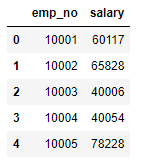

In [4]:
#to see max and min of salary ranges to create bins
salaries.salary.describe()

count    300024.000000
mean      52970.732451
std       14301.478491
min       40000.000000
25%       40000.000000
50%       48681.000000
75%       61758.000000
max      129492.000000
Name: salary, dtype: float64

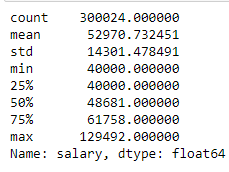

Text(0, 0.5, 'Count')

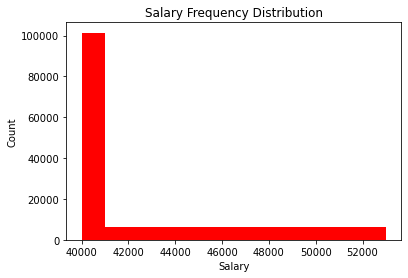

In [5]:
#Create a histogram to visualize the most common salary ranges for employees.
bins=[40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,53000]
plt.hist(salaries.salary,bins=bins,color='red')
plt.title("Salary Frequency Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")

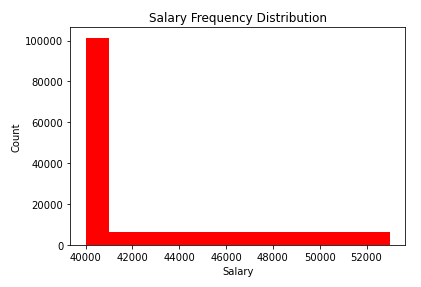

In [6]:
#load & join appropriate tables
employee_sal=pd.read_sql_query('''SELECT e.emp_no,s.salary,t.title FROM employee e INNER JOIN salaries s ON e.emp_no=s.emp_no INNER JOIN titles t ON e.emp_title_id=t.title_id;''', cnx)

employee_sal = pd.DataFrame(employee_sal)
employee_sal.head()

,emp_no,salary,title
0,10005,78228,Staff
1,10010,72488,Engineer
2,10011,42365,Staff
3,10018,55881,Senior Engineer
4,10035,41538,Senior Engineer


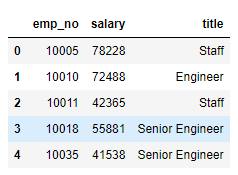

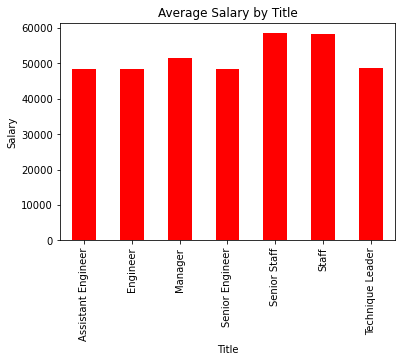

In [7]:
data_plot=employee_sal.groupby("title")["salary"].mean()
data_plot.plot(kind="bar",y="salary",color="red",title="Average Salary by Title",ylabel="Salary",xlabel="Title")

plt.show()

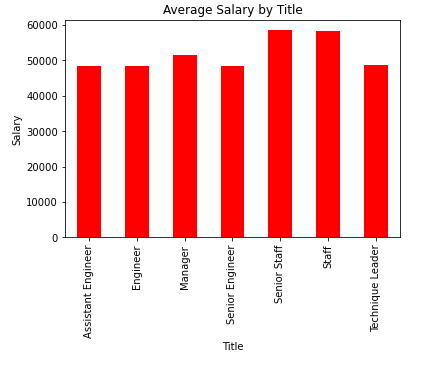

Looks like a curated data set since most salaries are between 40K and 41K. Also the senior engineer seems to have lower salary than an engineer. 